## Death Rate Data Cleanup and Plotting

#### In this notebook we are collasping the underlying cause of death dataset from the CDC Wonder Database to create our death rate metric. 
<center> The death rate metric is defined as: </center>
<center> (Deaths/Population)*100,000</center>


#### So, this is the number of people who have an underlying cause of death related to opioids per 100,000 people.

#### After, we are creating the difference-in-difference plots and pre-post plots. 

In [2]:
import pandas as pd
df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/vital_stats_merged.csv')
df.drop(['Crude Rate'], axis = 1)


,Unnamed: 0,Year,State,State Code,County,County Code,Cause of death,Cause of death Code,Deaths,Population,State_Code,County Name
0,32,2007,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County
1,33,2007,Arkansas,5.0,"Pulaski County, AR",5119.0,Poisoning by and exposure to other and unspeci...,Y14,11.0,373403.0,AR,Pulaski County
2,34,2007,Arkansas,5.0,"Sebastian County, AR",5131.0,Accidental poisoning by and exposure to other ...,X44,10.0,122946.0,AR,Sebastian County
3,35,2007,Arkansas,5.0,"Sebastian County, AR",5131.0,Poisoning by and exposure to other and unspeci...,Y14,11.0,122946.0,AR,Sebastian County
4,36,2007,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to antiep...,X41,17.0,1455715.0,CA,Alameda County
...,...,...,...,...,...,...,...,...,...,...,...,...
2096,4770,2012,Washington,53.0,"Spokane County, WA",53063.0,Accidental poisoning by and exposure to other ...,X44,44.0,475735.0,WA,Spokane County
2097,4771,2012,Washington,53.0,"Thurston County, WA",53067.0,Accidental poisoning by and exposure to narcot...,X42,10.0,258332.0,WA,Thurston County
2098,4772,2012,Washington,53.0,"Thurston County, WA",53067.0,Accidental poisoning by and exposure to other ...,X44,12.0,258332.0,WA,Thurston County
2099,4773,2012,Washington,53.0,"Yakima County, WA",53077.0,Accidental poisoning by and exposure to other ...,X44,15.0,246977.0,WA,Yakima County


In [3]:
df['State'].unique()

array(['Arkansas', 'California', 'Florida', 'Georgia', 'Hawaii', 'Iowa',
       'Kansas', 'Maine', 'Massachusetts', 'Minnesota', 'Mississippi',
       'Nebraska', 'Nevada', 'New York', 'Oregon', 'Texas', 'Virginia',
       'Washington', 'Montana', 'Wyoming'], dtype=object)

#### Here we are seperating the dataframe into three dataframes: one for Texas, Washington, and Florida. Only the states we have selected as comparison states are put into their respective dataframes. 

In [4]:
we_want_texas = ['Arkansas', 'California', 'Georgia', 'Missouri', 'New York', 'Wyoming']
we_want_washington = ['Alaska', 'Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
we_want_florida = ['California', 'Nevada', 'New York', 'Texas']

df_washington = df[df['State'].isin(we_want_washington)]
df_texas = df[df['State'].isin(we_want_texas)]
df_florida = df[df['State'].isin(we_want_florida)]

#### Below we are grouped each data frame on the year. We do this to have a single death rate per year. 

In [5]:
groupedby_df_washington = df_washington.groupby(["Year"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Death Rate'] = (groupedby_df_washington['Deaths']/groupedby_df_washington['Population'])*100_000

/tmp/ipykernel_9661/4193355366.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_washington = df_washington.groupby(["Year"]).sum()


In [6]:
groupedby_df_texas = df_texas.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_texas = groupedby_df_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_texas['Death Rate'] = (groupedby_df_texas['Deaths']/groupedby_df_texas['Population'])*100_000

/tmp/ipykernel_9661/1352553882.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_texas = df_texas.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use


In [7]:
groupedby_df_florida = df_florida.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_florida = groupedby_df_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_florida['Death Rate'] = (groupedby_df_florida['Deaths']/groupedby_df_florida['Population'])*100_000

/tmp/ipykernel_9661/110551209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_florida = df_florida.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use


#### These are the final dataframes with a death rate per 100,000 people per year. 

In [33]:
groupedby_df_florida

,Year,Unnamed: 0,State Code,County Code,Deaths,Population,Death Rate
0,2007,52965,4082.0,4099044.0,6328.0,257961557.0,2.453079
1,2008,164849,3662.0,3677834.0,6047.0,251592002.0,2.403495
2,2009,308221,4084.0,4102506.0,6449.0,271885390.0,2.371955
3,2010,460727,4254.0,4272508.0,6434.0,287509238.0,2.237841
4,2011,636666,4554.0,4573107.0,7167.0,285728800.0,2.508323
5,2012,798886,4440.0,4458310.0,7032.0,297838744.0,2.361009


In [9]:
groupedby_df_texas

,Year,Unnamed: 0,State Code,County Code,Deaths,Population,Death Rate
0,2007,27289,2092.0,2100820.0,4866.0,201800261.0,2.411295
1,2008,130120,2030.0,2039550.0,4917.0,207654984.0,2.367870
2,2009,224083,1779.0,1787962.0,4819.0,212419875.0,2.268620
3,2010,360119,2081.0,2091159.0,4931.0,227149998.0,2.170812
4,2011,496276,2194.0,2204241.0,5439.0,220445483.0,2.467277
5,2012,647654,2323.0,2333576.0,5436.0,230657427.0,2.356742


In [10]:
groupedby_df_washington

,Year,Unnamed: 0,State Code,County Code,Deaths,Population,Death Rate
0,2007,23511,1755.0,1761101.0,1508.0,36314673.0,4.152591
1,2008,62870,1660.0,1664732.0,1347.0,33922930.0,3.970765
2,2009,119398,1900.0,1907016.0,1457.0,33077506.0,4.404806
3,2010,156712,1727.0,1730594.0,1278.0,36298604.0,3.520797
4,2011,265780,2420.0,2427434.0,1714.0,44399089.0,3.860440
5,2012,327465,2319.0,2326285.0,1671.0,45061198.0,3.708290


In [11]:
we_want_only_texas = ['Texas']
we_want_only_washington = ['Washington']
we_want_only_florida = ['Florida']

df_only_washington = df[df['State'].isin(we_want_only_washington)]
df_only_texas = df[df['State'].isin(we_want_only_texas)]
df_only_florida = df[df['State'].isin(we_want_only_florida)]

In [36]:
df_only_washington

,Unnamed: 0,Year,State,State Code,County,County Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate,State_Code,County Name
311,680,2007,Washington,53.0,"Benton County, WA",53005.0,Accidental poisoning by and exposure to other ...,X44,10.0,161669.0,Unreliable,WA,Benton County
312,681,2007,Washington,53.0,"Clallam County, WA",53009.0,Accidental poisoning by and exposure to other ...,X44,10.0,70186.0,Unreliable,WA,Clallam County
313,682,2007,Washington,53.0,"Clark County, WA",53011.0,Accidental poisoning by and exposure to narcot...,X42,29.0,408820.0,7.1,WA,Clark County
314,683,2007,Washington,53.0,"King County, WA",53033.0,Accidental poisoning by and exposure to antiep...,X41,11.0,1847986.0,Unreliable,WA,King County
315,684,2007,Washington,53.0,"King County, WA",53033.0,Accidental poisoning by and exposure to narcot...,X42,90.0,1847986.0,4.9,WA,King County
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,4769,2012,Washington,53.0,"Spokane County, WA",53063.0,Accidental poisoning by and exposure to narcot...,X42,23.0,475735.0,4.8,WA,Spokane County
2096,4770,2012,Washington,53.0,"Spokane County, WA",53063.0,Accidental poisoning by and exposure to other ...,X44,44.0,475735.0,9.2,WA,Spokane County
2097,4771,2012,Washington,53.0,"Thurston County, WA",53067.0,Accidental poisoning by and exposure to narcot...,X42,10.0,258332.0,Unreliable,WA,Thurston County
2098,4772,2012,Washington,53.0,"Thurston County, WA",53067.0,Accidental poisoning by and exposure to other ...,X44,12.0,258332.0,Unreliable,WA,Thurston County


In [13]:
groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Death Rate'] = (groupedby_df_only_washington['Deaths']/groupedby_df_only_washington['Population'])*100_000

/tmp/ipykernel_9661/348946759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum()


In [14]:
groupedby_df_only_texas = df_only_texas.groupby(["Year"]).sum() 
groupedby_df_only_texas = groupedby_df_only_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_texas['Death Rate'] = (groupedby_df_only_texas['Deaths']/groupedby_df_only_texas['Population'])*100_000

/tmp/ipykernel_9661/2730766202.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_only_texas = df_only_texas.groupby(["Year"]).sum()


In [37]:
groupedby_df_only_florida = df_only_florida.groupby(["Year"]).sum() 
groupedby_df_only_florida = groupedby_df_only_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_florida['Death Rate'] = (groupedby_df_only_florida['Deaths']/groupedby_df_only_florida['Population'])*100_000

/tmp/ipykernel_9661/241970509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupedby_df_only_florida = df_only_florida.groupby(["Year"]).sum()


### Adding years since policy implementation 

In [48]:
def label_row(row): 
    if row['Year'] == 2007:
        return -3
    if row['Year'] == 2008: 
        return -2
    if row['Year'] == 2009:
        return -1
    if row['Year'] == 2010: 
        return 0
    if row['Year'] == 2011: 
        return 1
    if row['Year'] == 2012: 
        return 2
groupedby_df_only_florida['Years since policy'] = groupedby_df_only_florida.apply (lambda row: label_row(row), axis = 1) 
groupedby_df_only_texas['Years since policy'] = groupedby_df_only_texas.apply (lambda row: label_row(row), axis = 1) 
groupedby_df_only_washington['Years since policy'] = groupedby_df_only_washington.apply (lambda row: label_row(row), axis = 1) 



groupedby_df_florida['Years since policy'] = groupedby_df_florida.apply (lambda row: label_row(row), axis = 1) 
groupedby_df_texas['Years since policy'] = groupedby_df_texas.apply (lambda row: label_row(row), axis = 1) 
groupedby_df_washington['Years since policy'] = groupedby_df_washington.apply (lambda row: label_row(row), axis = 1) 

## Plotting

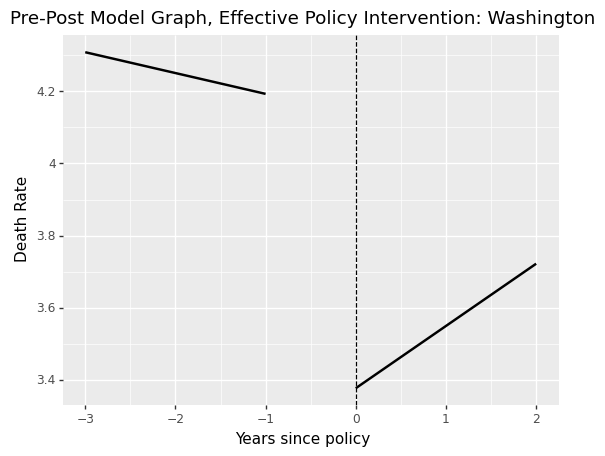

In [68]:
from plotnine import *

g = (
    ggplot(groupedby_df_only_washington, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_washington[groupedby_df_only_washington["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Washington")
)
#g.save("images/prepost_successful.pdf")
print(g)

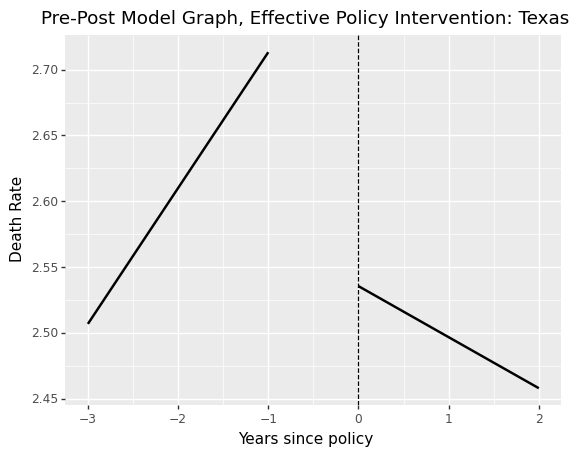

In [70]:
g = (
    ggplot(groupedby_df_only_texas, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_texas[groupedby_df_only_texas["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_texas[groupedby_df_only_texas["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Texas")
)
#g.save("images/prepost_successful.pdf")
print(g)

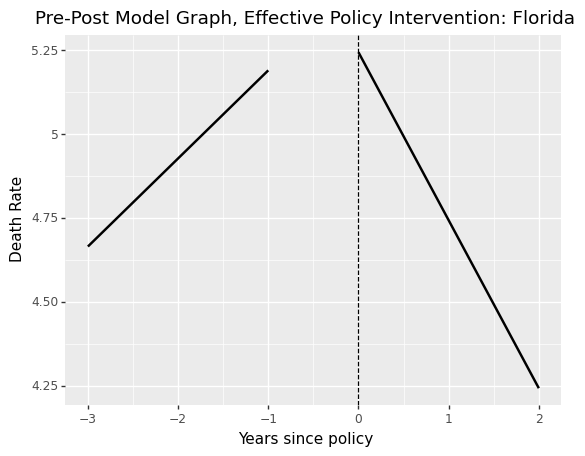

In [69]:
g = (
    ggplot(groupedby_df_only_florida, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_florida[groupedby_df_only_florida["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_florida[groupedby_df_only_florida["Years since policy"] >= 0],
        se=False,
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Florida")
)
#g.save("images/prepost_successful.pdf")
print(g)

#### Difference in Difference

In [22]:
groupedby_df_only_florida['Policy or Control'] = 'Policy'
groupedby_df_only_washington['Policy or Control'] = 'Policy'
groupedby_df_only_texas['Policy or Control'] = 'Policy'

In [23]:
groupedby_df_florida['Policy or Control'] = 'Control'
groupedby_df_washington['Policy or Control'] = 'Control'
groupedby_df_texas['Policy or Control'] = 'Control'

In [27]:
texas_policy_control = pd.concat([groupedby_df_texas, groupedby_df_only_texas])

In [28]:
texas_policy_control

,Year,Unnamed: 0,State Code,County Code,Deaths,Population,Death Rate,Years since policy,Policy or Control
0,2007,27289,2092.0,2100820.0,4866.0,201800261.0,2.411295,-3,Control
1,2008,130120,2030.0,2039550.0,4917.0,207654984.0,2.367870,-2,Control
2,2009,224083,1779.0,1787962.0,4819.0,212419875.0,2.268620,-1,Control
3,2010,360119,2081.0,2091159.0,4931.0,227149998.0,2.170812,0,Control
4,2011,496276,2194.0,2204241.0,5439.0,220445483.0,2.467277,1,Control
5,2012,647654,2323.0,2333576.0,5436.0,230657427.0,2.356742,2,Control
0,2007,26076,1968.0,1977893.0,1360.0,53895593.0,2.523397,-3,Policy
1,2008,48636,1680.0,1688731.0,1105.0,42881197.0,2.576887,-2,Policy
2,2009,100251,2256.0,2267483.0,1521.0,55718995.0,2.729769,-1,Policy
3,2010,132459,2160.0,2170897.0,1450.0,58511163.0,2.478160,0,Policy


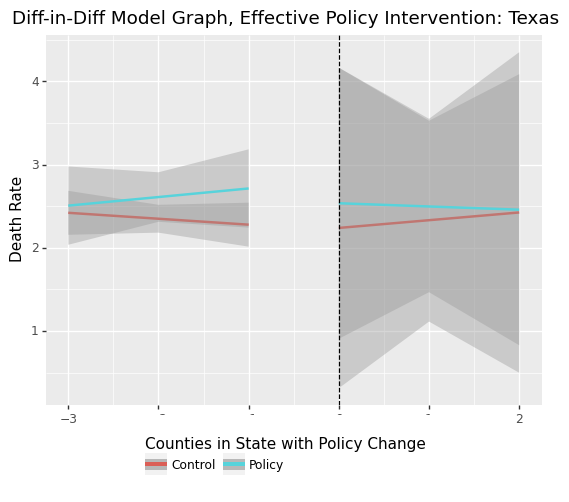

In [34]:
g = (
    ggplot(
        texas_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=texas_policy_control[texas_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=texas_policy_control[texas_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Texas",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(g)

In [31]:
washington_policy_control = pd.concat([groupedby_df_washington, groupedby_df_only_washington])
florida_policy_control = pd.concat([groupedby_df_florida, groupedby_df_only_florida])

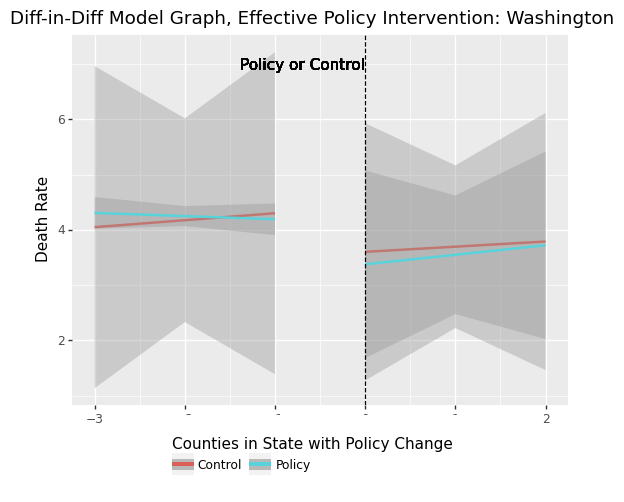

In [32]:
g = (
    ggplot(
        washington_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=washington_policy_control[washington_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Washington",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(g)

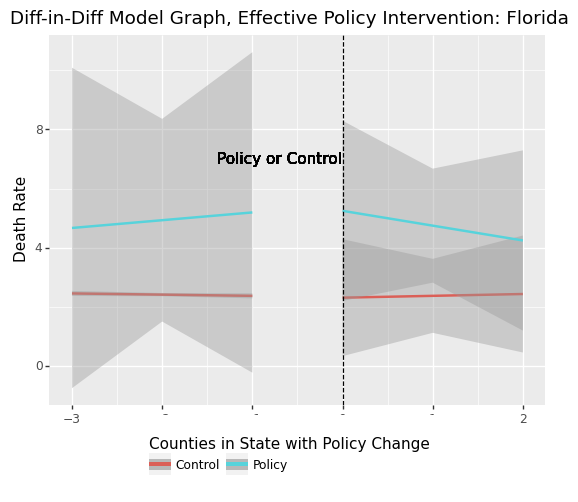

In [33]:
g = (
    ggplot(
        florida_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=florida_policy_control[florida_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=florida_policy_control[florida_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Florida",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(g)